#### Feature  Engineering


1. what is Feature  Engineering
2. Techniques: Imputation, handling outlier: visualization and statistical methods such as std and percentile. Log transformation and Binig also One hot Encoding
2. what is Outlier 
3. Outlier detection and removal suing std deviation
4. what is Z Score

#### Creating the data

In [1]:
from pandas import*

In [2]:
table = [
   ['Mohit', 5.3],# 1st row
   ['Sakshi', 5.2],  # 2nd row
   ['Arun', 5.1], # and so on...
   ['Varun', 4.9],
   ['Ani', 7.1],
   ['Krish', 5.3],# 1st row
   ['Mahendra', 5.2],  # 2nd row
   ['Ankur', 5.1], # and so on...
   ['Aman', 4.9],
   ['Ajay', 7.1],
   ['Ritu', 8.1],
   ['Kavya', 5.3],# 1st row
   ['Yatin', 6.2],  # 2nd row
   ['Ashruti', 5.1], # and so on...
   ['Suraj', 6.9],
   ['Ruchi', 8.1]
]

In [4]:
headings = ['Name', 'Height']
data = DataFrame(columns=headings, data=table)
data.head()

,Name,Height
0,Mohit,5.3
1,Sakshi,5.2
2,Arun,5.1
3,Varun,4.9
4,Ani,7.1


#### Detect the Outlier

In [ ]:
# using percentile method quantile()

In [5]:
max_threshold = data['Height'].quantile(0.95)
max_threshold

8.1

In [6]:
data[data['Height']> max_threshold]

,Name,Height


In [7]:
min_threshold = data['Height'].quantile(0.05)
min_threshold

4.9

In [8]:
data[data['Height']< min_threshold]

,Name,Height


In [ ]:
# Remove the outlier......

In [9]:
data[(data['Height']< max_threshold) & (data['Height']>min_threshold)]

,Name,Height
0,Mohit,5.3
1,Sakshi,5.2
2,Arun,5.1
4,Ani,7.1
5,Krish,5.3
6,Mahendra,5.2
7,Ankur,5.1
9,Ajay,7.1
11,Kavya,5.3
12,Yatin,6.2


In [ ]:
#normal range of height....

In [20]:
dat = read_csv('Bengaluru_House_Data.csv')
dat.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


#### Working with missing values

In [21]:
dat.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [22]:
sum(dat.isna().sum(axis = 0) > 0)

5

In [23]:
sum(dat.isna().sum(axis = 1) > 0)

5824

In [24]:
dat.shape

(13320, 9)

<AxesSubplot:>

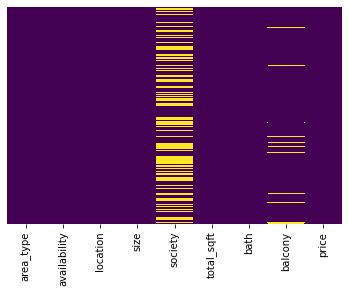

In [25]:
import numpy as np
from pandas import*


import seaborn as sns
sns.heatmap(dat.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [26]:
dat = dat.fillna(0)

<AxesSubplot:>

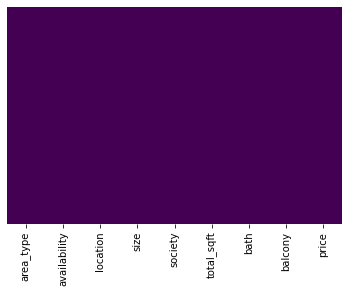

In [27]:
sns.heatmap(dat.isnull(),yticklabels=False,cbar=False, cmap='viridis')

#### Working with extra columns

In [29]:
data = dat.drop('area_type',axis = 'columns')
data.shape

(13320, 8)

In [30]:
data2 = data.drop('availability',axis = 'columns')

In [32]:
data2.head(3)

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00


In [33]:
data3 = data2.drop('location', axis = 'columns')
data3.head()

,size,society,total_sqft,bath,balcony,price
0,2 BHK,Coomee,1056,2.0,1.0,39.07
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3 BHK,0,1440,2.0,3.0,62.00
3,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,2 BHK,0,1200,2.0,1.0,51.00


In [38]:
data = data3.drop('size',axis = 'columns')
data4.head(2)

,society,total_sqft,bath,balcony,price
0,Coomee,1056,2.0,1.0,39.07
1,Theanmp,2600,5.0,3.0,120.00


In [40]:
data.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.677853,1.511937,112.565627
std,1.352467,0.864240,148.971674
min,0.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [43]:
data.dtypes

society        object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [47]:
min_threshold,max_threshold = data['price'].quantile([0.001,0.999])
min_threshold,max_threshold

(11.159500000000001, 2000.0)

In [48]:
data[data['price']<min_threshold]

,society,total_sqft,bath,balcony,price
171,Jae 1hu,450,1.0,1.0,11.00
942,Jae 2hu,400,1.0,1.0,11.00
1471,0,340,1.0,1.0,10.00
2437,Jae 1hu,395,1.0,1.0,10.25
4113,0,167Sq. Meter,3.0,2.0,10.00
5410,Jae 1hu,400,1.0,1.0,10.00
7482,0,470,2.0,1.0,10.00
8594,0,450,1.0,1.0,9.00
8653,0,640,1.0,0.0,10.50
10526,KHatsFl,284,1.0,1.0,8.00


In [49]:
data[data['price']> max_threshold]

,society,total_sqft,bath,balcony,price
408,0,12000,6.0,3.0,2200.0
605,0,12000,7.0,3.0,2200.0
2623,0,30000,4.0,0.0,2100.0
3180,Kierser,8321,5.0,3.0,2700.0
4162,Epllan,7000,5.0,0.0,2050.0
6421,Prood G,2940,3.0,2.0,2250.0
10304,0,10624,4.0,2.0,2340.0
11080,0,8321,5.0,2.0,2912.0
11763,0,9600,7.0,2.0,2736.0
12443,0,4350,8.0,0.0,2600.0


#### Remove the Outliers

In [50]:
new_data = data[(data['price']<max_threshold) & (data['price']>min_threshold)]
new_data.shape

(13291, 5)

In [51]:
new_data.describe()

,bath,balcony,price
count,13291.000000,13291.000000,13291.000000
mean,2.676097,1.512377,110.010361
std,1.346696,0.863816,125.434347
min,0.000000,0.000000,11.500000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,1950.000000


In [52]:
import seaborn as sns

In [53]:
relation =  new_data.corr()

<AxesSubplot:>

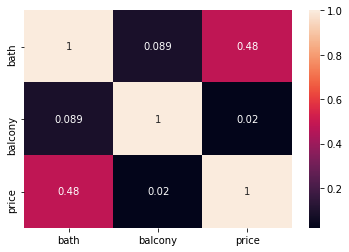

In [54]:
sns.heatmap(relation,annot=True)

#### Z-Score: 

In [ ]:
table = [
   ['Mohit', 5.3],# 1st row
   ['Sakshi', 5.2],  # 2nd row
   ['Arun', 5.1], # and so on...
   ['Varun', 4.9],
   ['Ani', 7.1],
   ['Krish', 5.3],# 1st row
   ['Mahendra', 5.2],  # 2nd row
   ['Ankur', 5.1], # and so on...
   ['Aman', 4.9],
   ['Ajay', 7.1],
   ['Ritu', 8.1],
   ['Kavya', 5.3],# 1st row
   ['Yatin', 6.2],  # 2nd row
   ['Ashruti', 5.1], # and so on...
   ['Suraj', 6.9],
   ['Ruchi', 8.1]
]

In [55]:
headings = ['Name', 'Height']
df = DataFrame(columns=headings, data=table)
df.head()

,Name,Height
0,Mohit,5.3
1,Sakshi,5.2
2,Arun,5.1
3,Varun,4.9
4,Ani,7.1


In [57]:
df['Zscore'] = (df['Height']-df['Height'].mean())/df['Height'].std()
df.head(2)

,Name,Height,Zscore
0,Mohit,5.3,-0.552026
1,Sakshi,5.2,-0.639476
